In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Data processing

In [2]:
df = pd.read_csv('shenimet_infarktit.csv', sep="|")
df

,ID,Gjinia,Mosha,Hipertension,Semundje_zemres,Martuar_ndonjeher,Lloji_punesimit,Zona_jeteses,Mesatarja_glukozes_niveli,bmi,Duhanpirja,Infarkt
0,9046,Male,67.0,Jo,Po,Po,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,Jo,Jo,Po,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,Jo,Po,Po,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,Jo,Jo,Po,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Po,Jo,Po,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,Po,Jo,Po,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,Jo,Jo,Po,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,Jo,Jo,Po,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,Jo,Jo,Po,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# Convert categorical data to numeric where necessary
df['Infarkt'] = df['Infarkt'].astype(int)

# Group by gender and calculate the proportion of heart attacks
heart_attack_by_gender = df.groupby('Gjinia')['Infarkt'].mean()

# Display the result
heart_attack_by_gender

Gjinia
Female    0.047094
Male      0.051064
Other     0.000000
Name: Infarkt, dtype: float64

In [4]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [7]:
# Define feature columns and target column
features = ['Gjinia', 'Mosha', 'Hipertension', 'Semundje_zemres', 'Martuar_ndonjeher', 'Zona_jeteses', 'Mesatarja_glukozes_niveli', 'bmi', 'Duhanpirja']
target = 'Infarkt'

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Data interpretation

####  How many female/male had heart-attack

In [8]:
infrakt_yes = df [df['Infarkt'] == 1 ]
gender_counts = infrakt_yes['Gjinia'].value_counts()
gender_counts

Gjinia
0    141
1    108
Name: count, dtype: int64

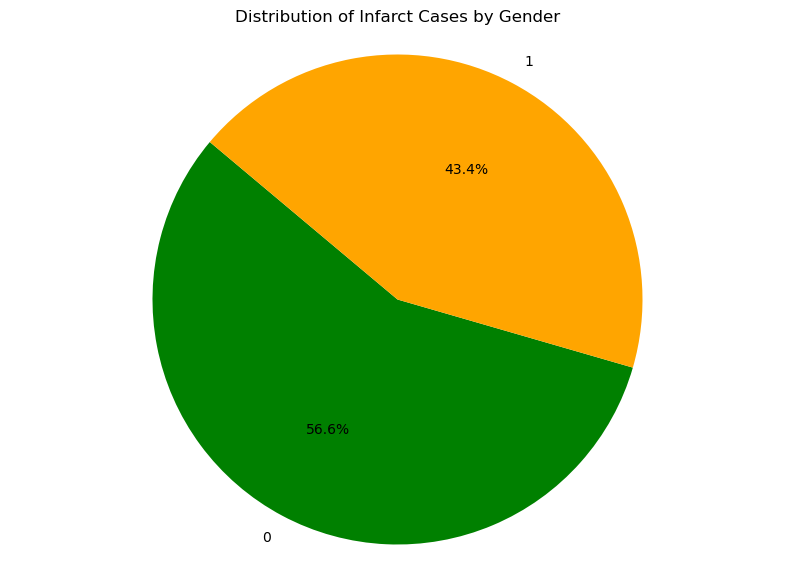

In [9]:
plt.figure(figsize=(10, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'orange'])
plt.title('Distribution of Infarct Cases by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('results/Distribution of Infarct Cases by Gender.png', format='png')
plt.show()

#### Group age of females that had infract

In [10]:
female_yes = infrakt_yes [ (infrakt_yes['Gjinia'] == 'Female') ]
female_yes_counts = female_yes['Mosha'].value_counts()
female_yes_counts

Series([], Name: count, dtype: int64)

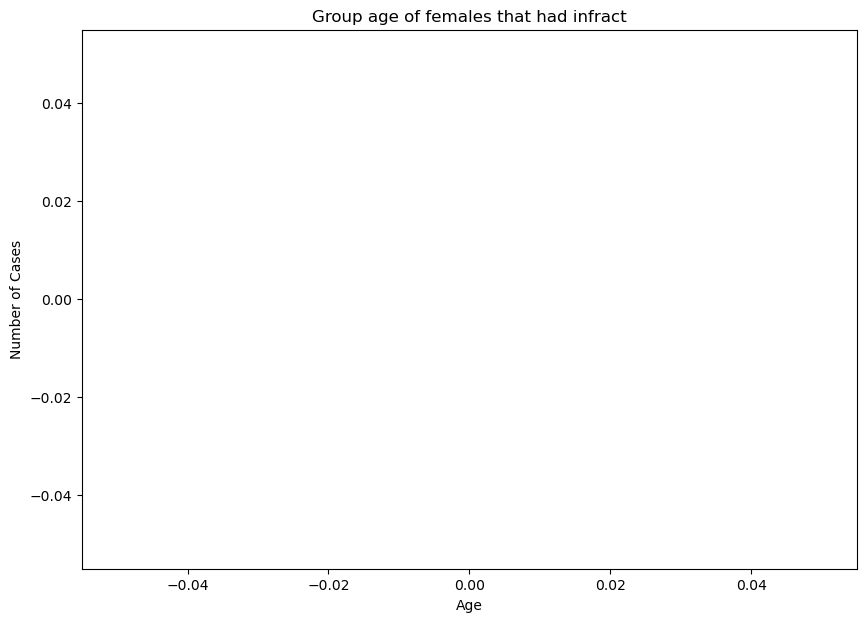

In [11]:
# Plot a bar chart
plt.figure(figsize=(10, 7))
plt.bar(female_yes_counts.index, female_yes_counts.values)
plt.title('Group age of females that had infract')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.savefig('results/Group age of females that had infract.png', format='png')
plt.show()

In [12]:
infrakt_yes

Duhanpirja_counts = infrakt_yes['Duhanpirja'].value_counts()
Duhanpirja_counts

Duhanpirja
2    90
1    70
0    47
3    42
Name: count, dtype: int64

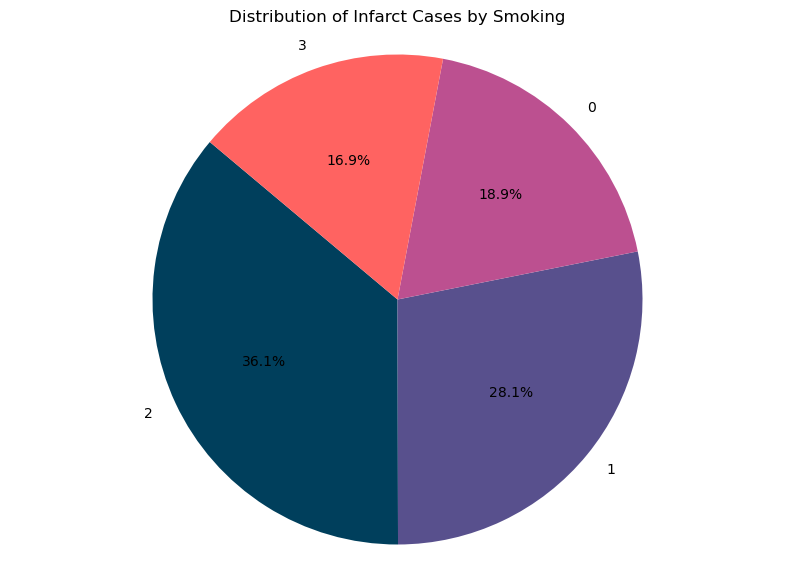

In [13]:
plt.figure(figsize=(10, 7))
plt.pie(Duhanpirja_counts, labels=Duhanpirja_counts.index, autopct='%1.1f%%', startangle=140, colors=['#003f5c', '#58508d', '#bc5090', '#ff6361'])
plt.title('Distribution of Infarct Cases by Smoking')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('results/Distribution of Infarct Cases by Smoking.png', format='png')
plt.show()

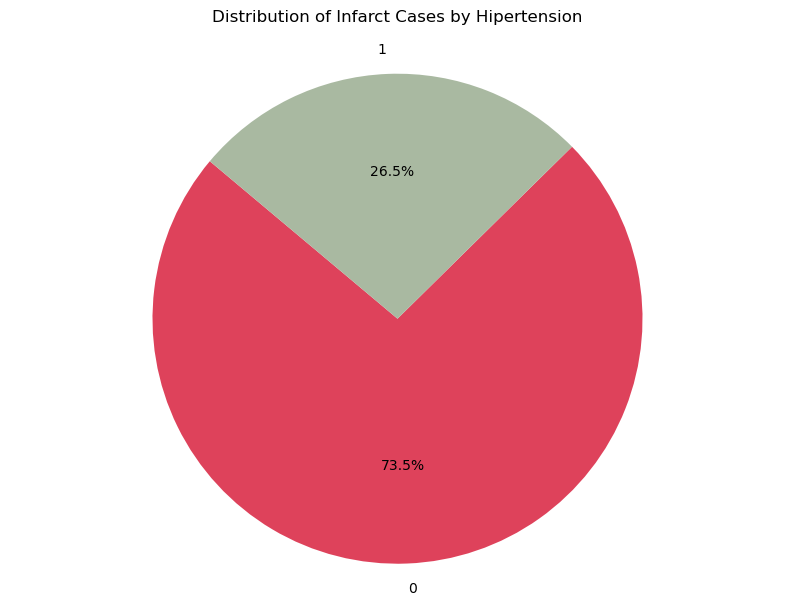

In [14]:
infrakt_yes

Hipertension_counts = infrakt_yes['Hipertension'].value_counts()
#infrakt_yes_me_semundje = infrakt_yes [ (infrakt_yes['Hipertension'] == 'Po') ]
plt.figure(figsize=(10, 7))
plt.pie(Hipertension_counts, labels=Hipertension_counts.index, autopct='%1.1f%%', startangle=140,colors=['#de425b', '#a9b9a1'])
plt.title('Distribution of Infarct Cases by Hipertension', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('results/Distribution of Infarct Cases by Hipertension.png', format='png')
plt.show()

In [15]:
infrakt_yes


,ID,Gjinia,Mosha,Hipertension,Semundje_zemres,Martuar_ndonjeher,Lloji_punesimit,Zona_jeteses,Mesatarja_glukozes_niveli,bmi,Duhanpirja,Infarkt
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,1,57.0,0,0,1,2,0,84.96,36.700000,0,1
245,49669,0,14.0,0,0,0,4,0,57.93,30.900000,0,1
246,27153,0,75.0,0,0,1,3,0,78.80,29.300000,1,1
247,34060,1,71.0,1,0,1,3,0,87.80,28.893237,0,1


In [16]:
infrakt_yes_me_semundje = infrakt_yes [ (infrakt_yes['Hipertension'] == 'Po') & (infrakt_yes['Semundje_zemres'] == 'Po') ]

grouped_by_gjinia = infrakt_yes_me_semundje.groupby('Gjinia').size()
grouped_by_gjinia

Series([], dtype: int64)

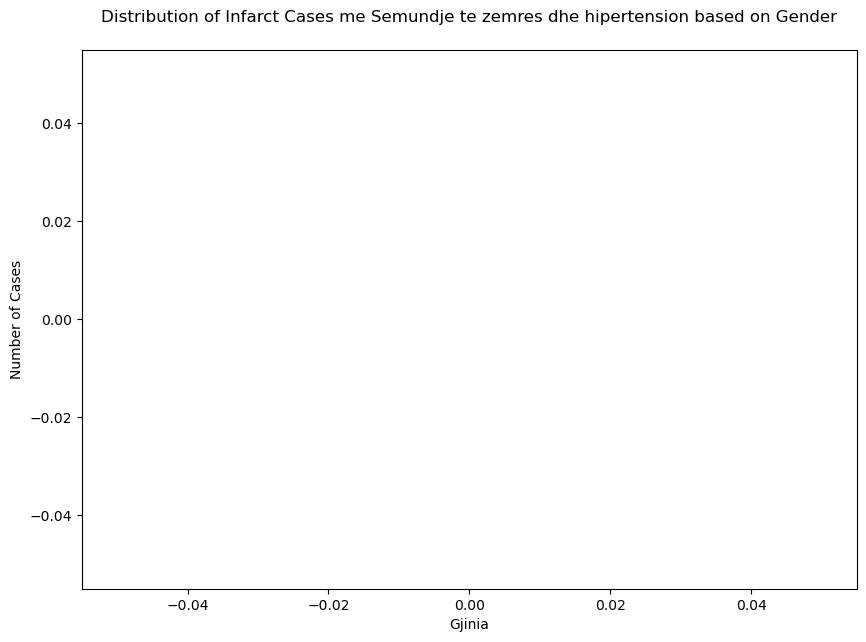

In [17]:
plt.figure(figsize=(10, 7))


plt.bar(grouped_by_gjinia.index, grouped_by_gjinia.values, color=['#da8b8f', '#a9b9a1'])

plt.title('Distribution of Infarct Cases me Semundje te zemres dhe hipertension based on Gender', pad=20)
plt.xlabel('Gjinia')
plt.ylabel('Number of Cases')
plt.savefig('results/Distribution of Infarct Cases me Semundje te zemres dhe hipertension based on Gender.png', format='png')
plt.show()




#### Sa femra kishin tension, semundje te zemres por asnjeher infrakt?

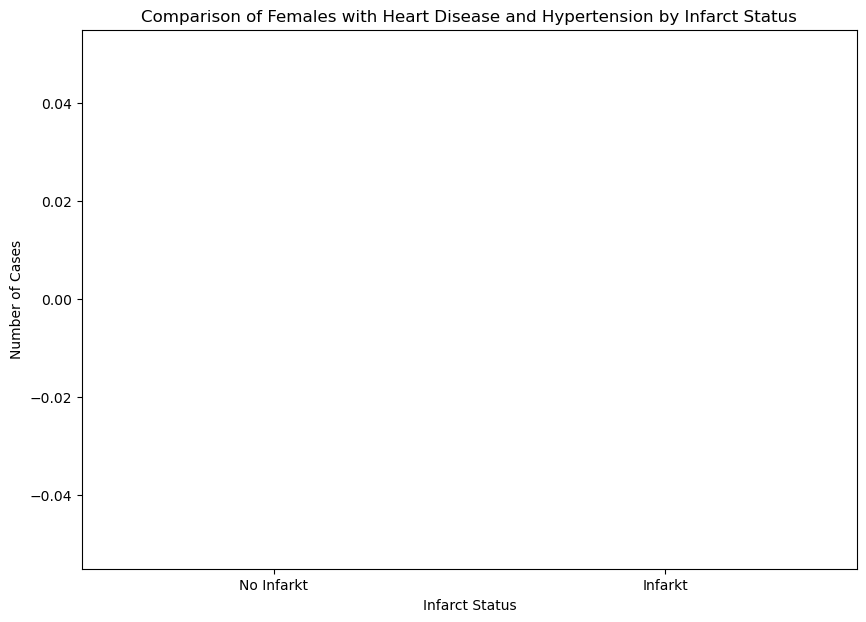

In [18]:
# Filter the DataFrames
df_female1 = df[(df['Gjinia'] == 'Female') & (df['Semundje_zemres'] == 'Po') & (df['Hipertension'] == 'Po') & (df['Infarkt'] == 0)]
df_female0 = df[(df['Gjinia'] == 'Female') & (df['Semundje_zemres'] == 'Po') & (df['Hipertension'] == 'Po') & (df['Infarkt'] == 1)]


# Count the occurrences
counts = [len(df_female1), len(df_female0)]
labels = ['No Infarkt', 'Infarkt']

# Plotting the bar chart
plt.figure(figsize=(10, 7))
plt.bar(labels, counts, color=['#6b9d57', '#a9b9a1'])
plt.title('Comparison of Females with Heart Disease and Hypertension by Infarct Status')
plt.xlabel('Infarct Status')
plt.ylabel('Number of Cases')
plt.savefig('results/Comparison_of_Females_with_Heart_Disease_and_Hypertension_by_Infarct_Status.png', format='png')
plt.show()

#### Sa njerz kishin tension, semundje te zemres por asnjeher infrakt?

<Figure size 1000x700 with 0 Axes>

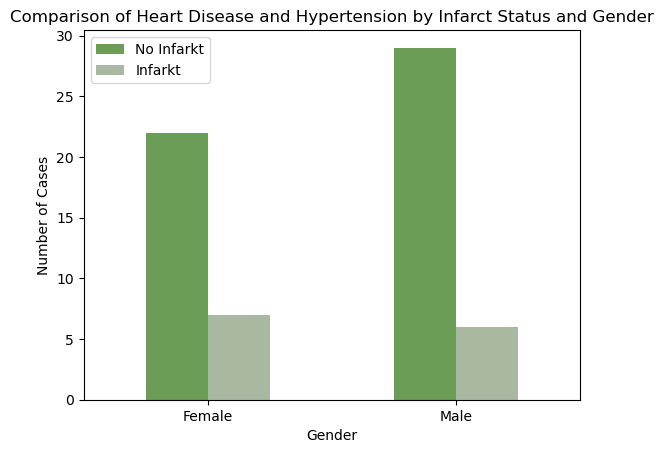

In [105]:
# Filter the DataFrames
df1 = df[ (df['Semundje_zemres'] == 'Po') & (df['Hipertension'] == 'Po') & (df['Infarkt'] == 0)]
df0 = df[ (df['Semundje_zemres'] == 'Po') & (df['Hipertension'] == 'Po') & (df['Infarkt'] == 1)]


# Count the occurrences for each gender and infarct status
counts_no_infarct = df1['Gjinia'].value_counts()
counts_infarct = df0['Gjinia'].value_counts()

# Combine the counts into a DataFrame
counts_df = pd.DataFrame({
    'No Infarkt': counts_no_infarct,
    'Infarkt': counts_infarct
}).fillna(0)

# Plotting the grouped bar chart
plt.figure(figsize=(10, 7))
counts_df.plot(kind='bar', color=['#6b9d57', '#a9b9a1'])
plt.title('Comparison of Heart Disease and Hypertension by Infarct Status and Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.savefig('results/Comparison_of_Heart_Disease_and_Hypertension_by_Infarct_Status_and_Gender.png', format='png')
plt.show()

# Model classifier to find the causes of heart attack

In [119]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.25      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.60      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022

Confusion Matrix:
 [[957   3]
 [ 61   1]]


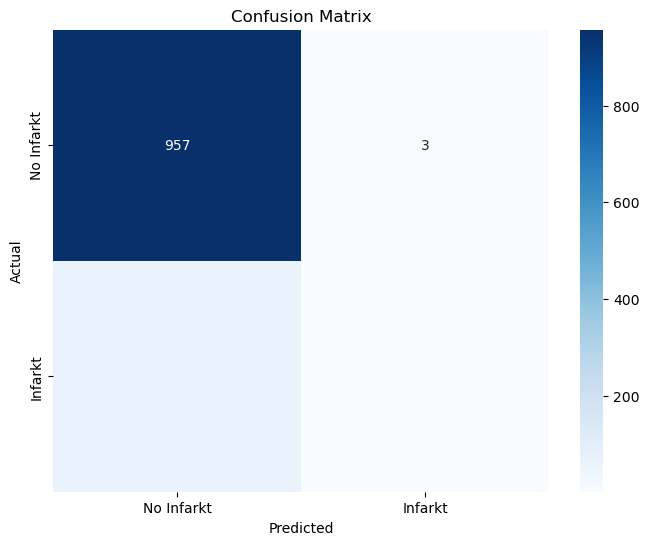

In [120]:
# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Infarkt', 'Infarkt'], yticklabels=['No Infarkt', 'Infarkt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


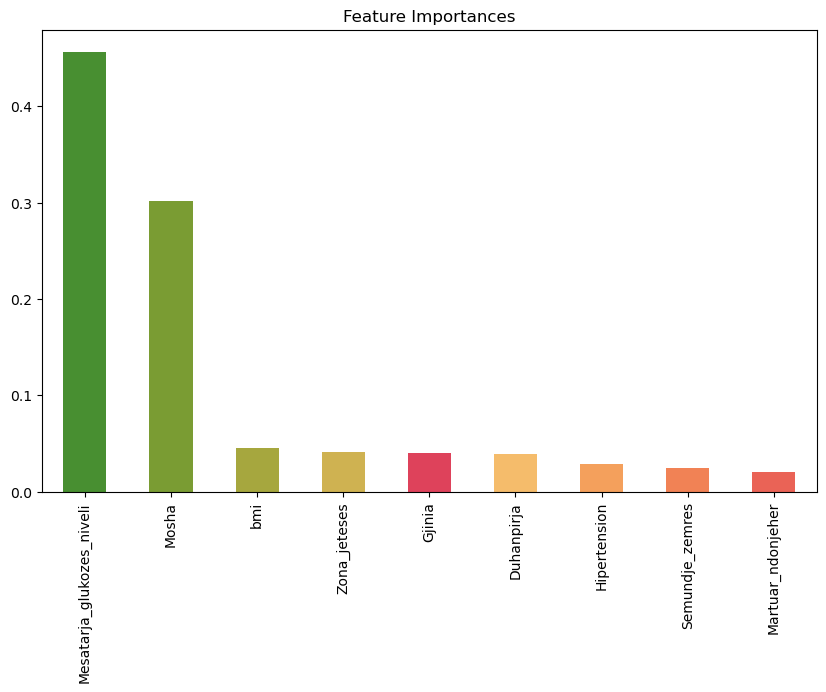

In [121]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color = ['#488f31', '#7a9c33', '#a6a73e','#cfb251', '#de425b', '#f5bc6b', '#f4a05c', '#f18255', '#ea6356'])
plt.title('Feature Importances')
plt.savefig('results/Model_classifier_for Feature Importances.png', format='png')

plt.show()


### Predict how common more likely to get heart attack female or male

In [33]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Hipertension'] = label_encoder.fit_transform(df['Hipertension'])
df['Semundje_zemres'] = label_encoder.fit_transform(df['Semundje_zemres'])
df['Duhanpirja'] = label_encoder.fit_transform(df['Duhanpirja'])

In [34]:
# Define features and target variable
X = df[[ 'Mosha', 'Hipertension', 'Semundje_zemres',   'Mesatarja_glukozes_niveli', 'bmi', 'Duhanpirja']]
y = df['Infarkt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

In [36]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Heart Attack', 'Heart Attack'])

accuracy

/home/blina/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/blina/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/blina/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9419439008480104

In [37]:
report

'                 precision    recall  f1-score   support\n\nNo Heart Attack       0.94      1.00      0.97      1444\n   Heart Attack       0.00      0.00      0.00        89\n\n       accuracy                           0.94      1533\n      macro avg       0.47      0.50      0.49      1533\n   weighted avg       0.89      0.94      0.91      1533\n'

In [38]:
# Get the coefficients and the corresponding feature names
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})

coefficients

,Feature,Coefficient
0,Mosha,0.068839
1,Hipertension,0.326540
2,Semundje_zemres,0.320808
3,Mesatarja_glukozes_niveli,0.004198
4,bmi,-0.001621
5,Duhanpirja,0.025766


### Random forest for predicting who is more more likely to get heart attack female or male

In [88]:
df

,ID,Gjinia,Mosha,Hipertension,Semundje_zemres,Martuar_ndonjeher,Lloji_punesimit,Zona_jeteses,Mesatarja_glukozes_niveli,bmi,Duhanpirja,Infarkt
0,9046,Male,67.0,Jo,Po,Po,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,Jo,Jo,Po,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,Jo,Po,Po,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,Jo,Jo,Po,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Po,Jo,Po,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,Po,Jo,Po,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,Jo,Jo,Po,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,Jo,Jo,Po,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,Jo,Jo,Po,Private,Rural,166.29,25.6,formerly smoked,0


In [20]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image


In [21]:
df = pd.read_csv('shenimet_infarktit.csv', sep="|")
df


,ID,Gjinia,Mosha,Hipertension,Semundje_zemres,Martuar_ndonjeher,Lloji_punesimit,Zona_jeteses,Mesatarja_glukozes_niveli,bmi,Duhanpirja,Infarkt
0,9046,Male,67.0,Jo,Po,Po,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,Jo,Jo,Po,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,Jo,Po,Po,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,Jo,Jo,Po,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Po,Jo,Po,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,Po,Jo,Po,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,Jo,Jo,Po,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,Jo,Jo,Po,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,Jo,Jo,Po,Private,Rural,166.29,25.6,formerly smoked,0


In [22]:
# Dropping 'Cabin' column due to missing values
drop_colums = ['Zona_jeteses', 'Lloji_punesimit', 'Lloji_punesimit', 'Martuar_ndonjeher', 'bmi']
df = df.drop(columns=drop_colums, axis=1)
df

,ID,Gjinia,Mosha,Hipertension,Semundje_zemres,Mesatarja_glukozes_niveli,Duhanpirja,Infarkt
0,9046,Male,67.0,Jo,Po,228.69,formerly smoked,1
1,51676,Female,61.0,Jo,Jo,202.21,never smoked,1
2,31112,Male,80.0,Jo,Po,105.92,never smoked,1
3,60182,Female,49.0,Jo,Jo,171.23,smokes,1
4,1665,Female,79.0,Po,Jo,174.12,never smoked,1
...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,Po,Jo,83.75,never smoked,0
5106,44873,Female,81.0,Jo,Jo,125.20,never smoked,0
5107,19723,Female,35.0,Jo,Jo,82.99,never smoked,0
5108,37544,Male,51.0,Jo,Jo,166.29,formerly smoked,0


In [23]:
df['Gjinia'] = df['Gjinia'].map({'Male':0,'Female':1,'NaN':0,})
df['Hipertension'] = df['Hipertension'].map({'Po':0,'Jo':1,})
df['Semundje_zemres'] = df['Semundje_zemres'].map({'Po':0,'Jo':1,})
df['Duhanpirja'] = df['Duhanpirja'].map({'formerly smoked':0,'never smoked':1,'smokes':0,'Unknown':1})


In [24]:
df

,ID,Gjinia,Mosha,Hipertension,Semundje_zemres,Mesatarja_glukozes_niveli,Duhanpirja,Infarkt
0,9046,0.0,67.0,1,0,228.69,0,1
1,51676,1.0,61.0,1,1,202.21,1,1
2,31112,0.0,80.0,1,0,105.92,1,1
3,60182,1.0,49.0,1,1,171.23,0,1
4,1665,1.0,79.0,0,1,174.12,1,1
...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,0,1,83.75,1,0
5106,44873,1.0,81.0,1,1,125.20,1,0
5107,19723,1.0,35.0,1,1,82.99,1,0
5108,37544,0.0,51.0,1,1,166.29,0,0


In [25]:
df.isnull().sum()


ID                           0
Gjinia                       1
Mosha                        0
Hipertension                 0
Semundje_zemres              0
Mesatarja_glukozes_niveli    0
Duhanpirja                   0
Infarkt                      0
dtype: int64

In [26]:
df = df[df['Gjinia'].notna()]


In [27]:
df.isnull().sum()



ID                           0
Gjinia                       0
Mosha                        0
Hipertension                 0
Semundje_zemres              0
Mesatarja_glukozes_niveli    0
Duhanpirja                   0
Infarkt                      0
dtype: int64

In [28]:
# Split the data into features (X) and target (y)
X = df.drop('Gjinia', axis=1)
y = df['Gjinia']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = rf.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5772994129158513


In [32]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x77226330efd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x77226336cca0>})

In [33]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 459}


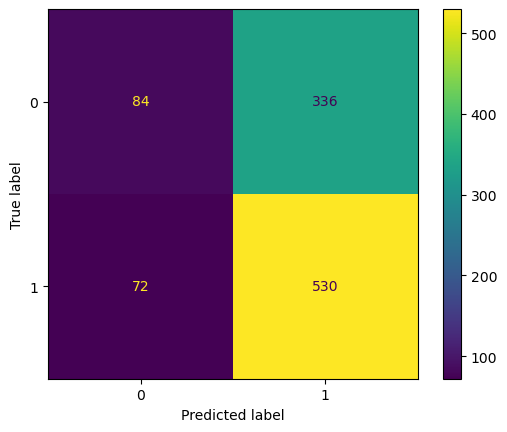

In [34]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create and display the confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Save the plot to an image file
plt.savefig('results/confusion_matrix.png')  # You can change the filename and format as needed

# Optionally, show the plot
plt.show()

In [35]:
!pip install  graphviz

In [36]:
feature_importances.drop('ID')

NameError: name 'feature_importances' is not defined

In [37]:
best_rf

RandomForestClassifier(max_depth=6, n_estimators=459)

In [38]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances

Mosha                        0.328533
Mesatarja_glukozes_niveli    0.266515
ID                           0.224477
Semundje_zemres              0.085946
Duhanpirja                   0.057879
Hipertension                 0.020509
Infarkt                      0.016141
dtype: float64